In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state=1, stratify=y
)

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [8]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

X_train_01_subset = X_train_std[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0 | (y_train == 1))]


we will going to do 'ovr' first

## sklearn Logistic Regression explanation

C -> regularization

What is regularization? - relevant articles

https://www.knime.com/blog/regularization-for-logistic-regression-l1-l2-gauss-or-laplace 

Summary : intentionally underfitting the training data to work better in unseen dataset

solver -> lbfgs 

What is lbfgs? 

optimization algorithm


#### mlxtend
instead of using author defined plot_decision_regions, I used mlxtend library's plot_decision_regions


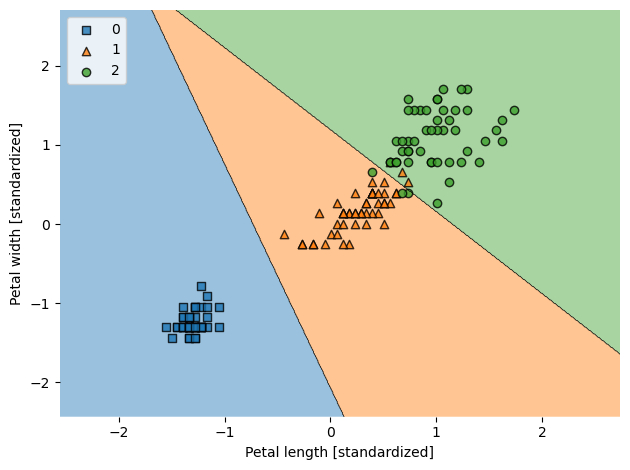

In [15]:
lr = LogisticRegression(C=100.0, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_std, y_train)

from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

plot_decision_regions(X_combined_std,
                     y_combined,
                     clf=lr,
                     legend=3)
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [24]:
print(lr.score(X_test_std, y_test))

0.9777777777777777


In [17]:
lr.predict_proba(X_test_std[:3,:])

array([[3.81527885e-09, 1.44792866e-01, 8.55207131e-01],
       [8.34020679e-01, 1.65979321e-01, 3.25737138e-13],
       [8.48831425e-01, 1.51168575e-01, 2.62277619e-14]])

In [19]:
X_test_std[:3,:]

array([[ 0.89820289,  1.44587881],
       [-1.16537974, -1.04507821],
       [-1.33269725, -1.17618121]])

In [20]:
lr.predict_proba(X_test_std[:3,:]).argmax(axis=1)

array([2, 0, 0], dtype=int64)

### multi_class = 'multinomial'


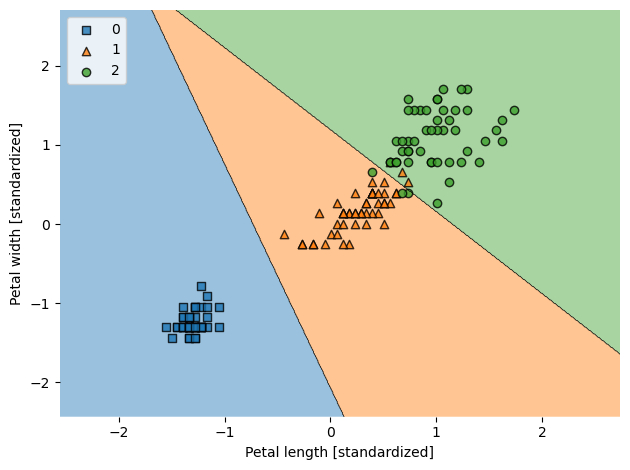

In [21]:
lr2 = LogisticRegression(C=100.0, solver='lbfgs', multi_class='multinomial')
lr2.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std,
                     y_combined,
                     clf=lr,
                     legend=3)
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [25]:
print(lr2.score(X_test_std, y_test))

0.9777777777777777


### Interesting point

It is quite interesting to see that there is not much difference in accuracy between using 'lr' and 'lr2'